In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

#results_complete.csv is the result of merging results.csv, maxprop.csv and cdmx_oracle.csv
df = pd.read_csv('results_complete.csv', na_values=['Infinity'])


In [2]:
#Filter results for a specific value e.g.

#Fix the buffer size to 50MB
df = df[df.buffer_size == 50] 
#Discard results for 800 and 1000
df = df[df.nodes <= 600]

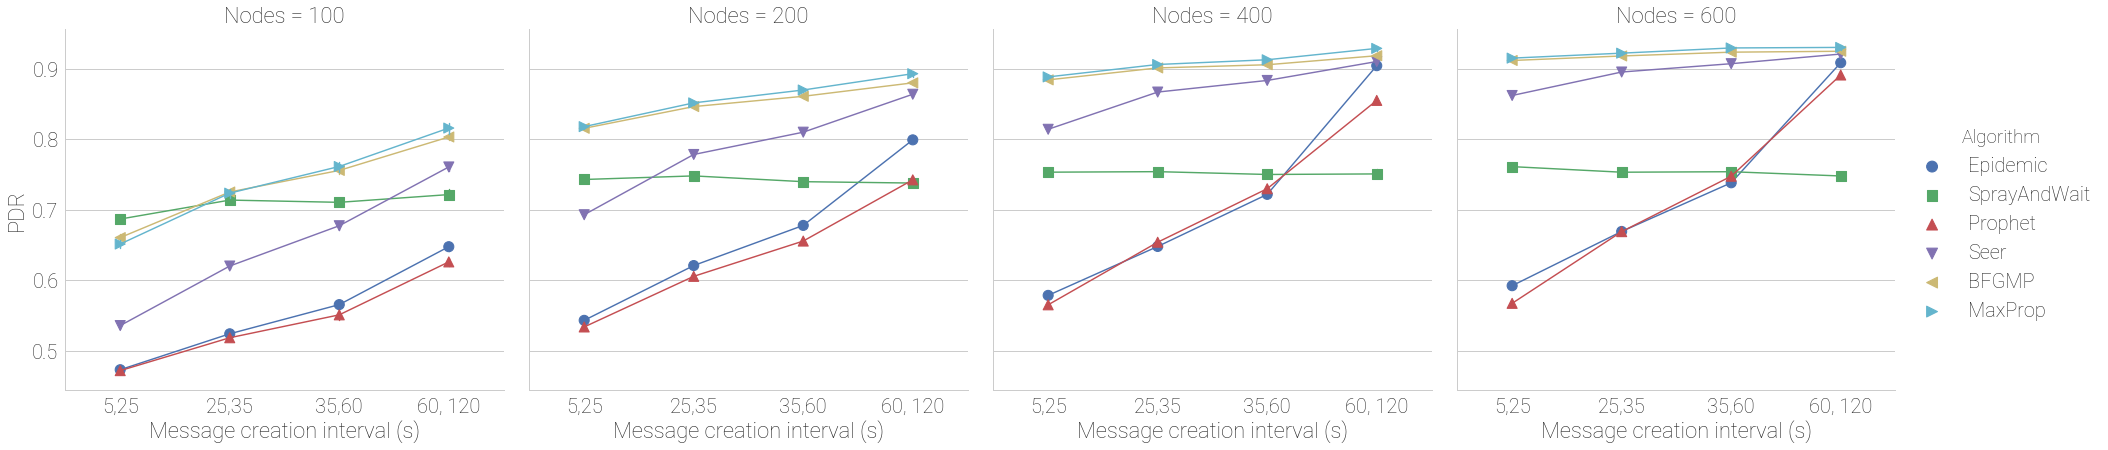

In [3]:
# Plot the delivery probability ratio
markers = ['o','s', '^', 'v', '<', '>']
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']

sns.set(style='whitegrid', font='Roboto', font_scale=2, rc={"lines.linewidth": 0.8, "legend.markerscale":3})
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_pdr.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='delivery_prob', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_pdr.svg')
    pdf.savefig()

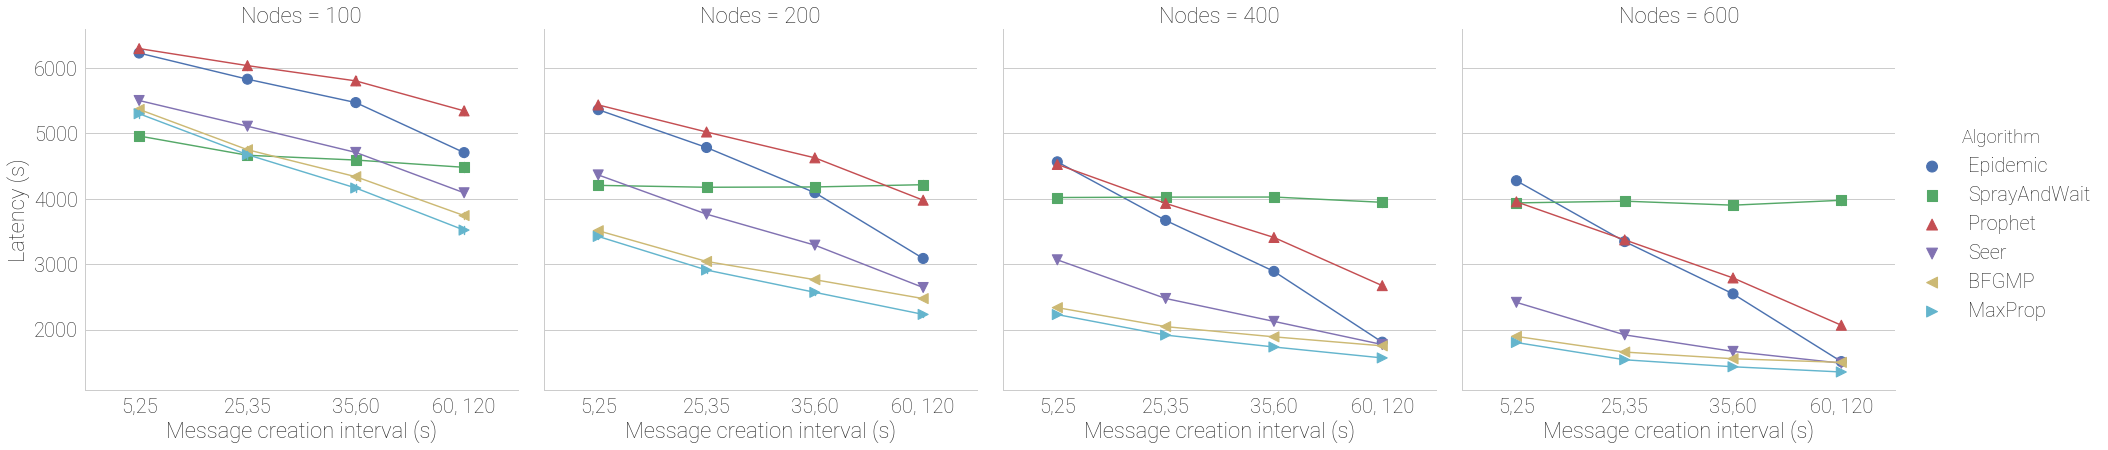

In [4]:
#Same as the above cell, for Latency
with PdfPages('VANET_latency.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='latency_avg', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_latency.svg')
    pdf.savefig()

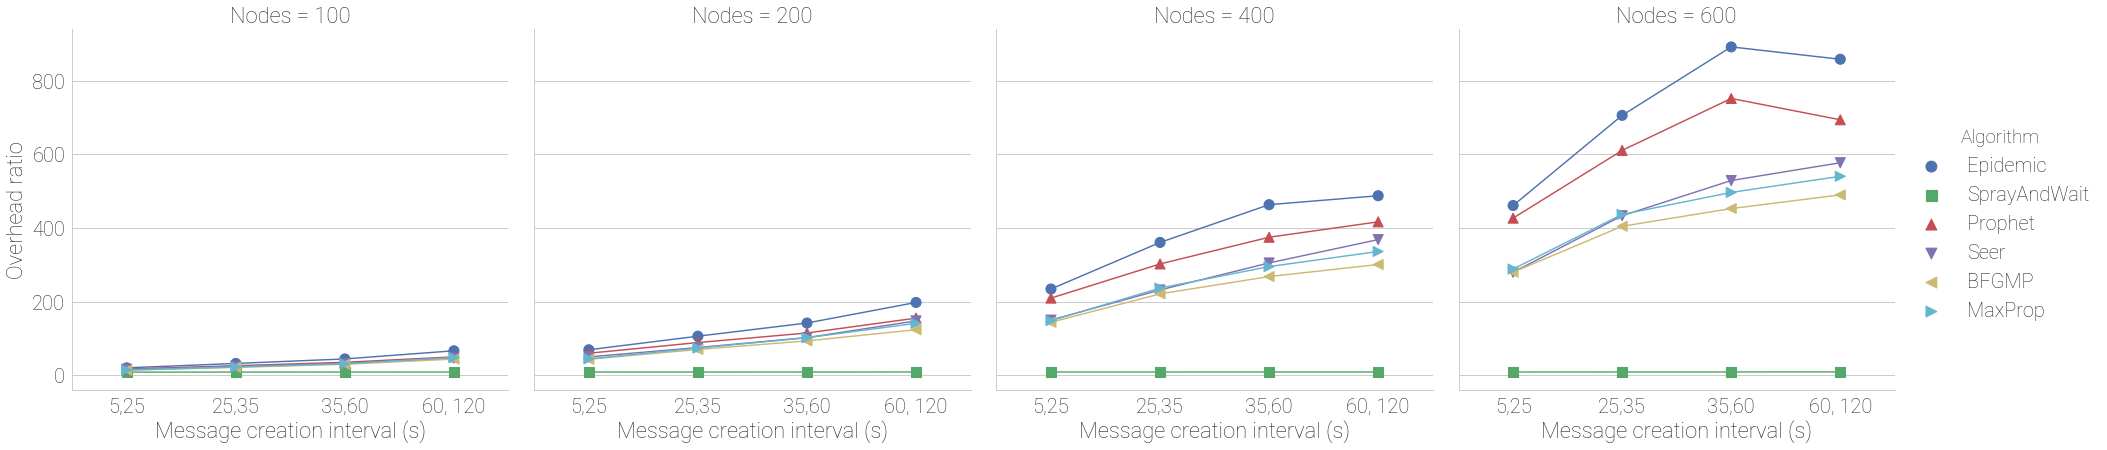

In [5]:
#Same as the above cell, for Latency
with PdfPages('VANET_overhead.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='overhead_ratio', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_overhead.svg')
    pdf.savefig()

In [6]:
# Find the incomplete values for certain columns and show the name of the simulation file
pd.set_option('display.max_colwidth', -1)
ids = df[df.speed_avg.isnull()]
# display(ids)
ids.task_id.unique()

array([  0.,  25.,   1.,  26.,   2.,   3.,  76., 127., 151., 153., 203.,
       250., 275., 326., 350., 353., 477., 478.])

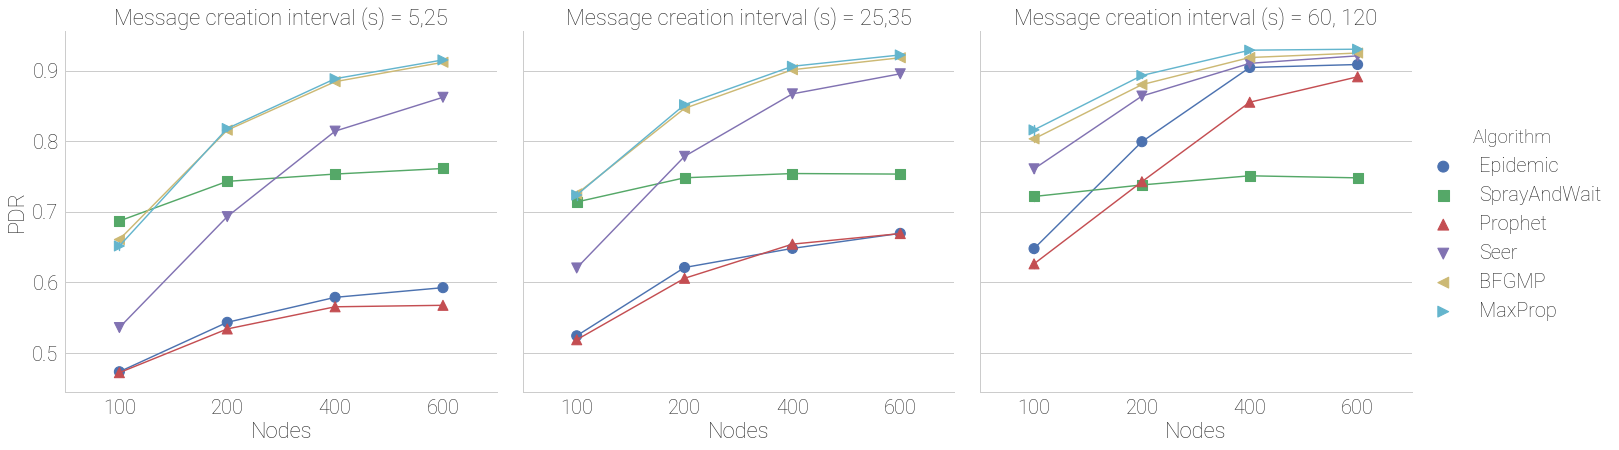

In [7]:
# Alternate plots
# Plot the delivery probability ratio
markers = ['o','s', '^', 'v', '<', '>']
x_axis_order = ['5,25', '25,35', '60, 120']

sns.set(style='whitegrid', font='Roboto', font_scale=2, rc={"lines.linewidth": 0.8, "legend.markerscale":3})
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_pdr.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='delivery_prob', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_pdr.svg')
    pdf.savefig()

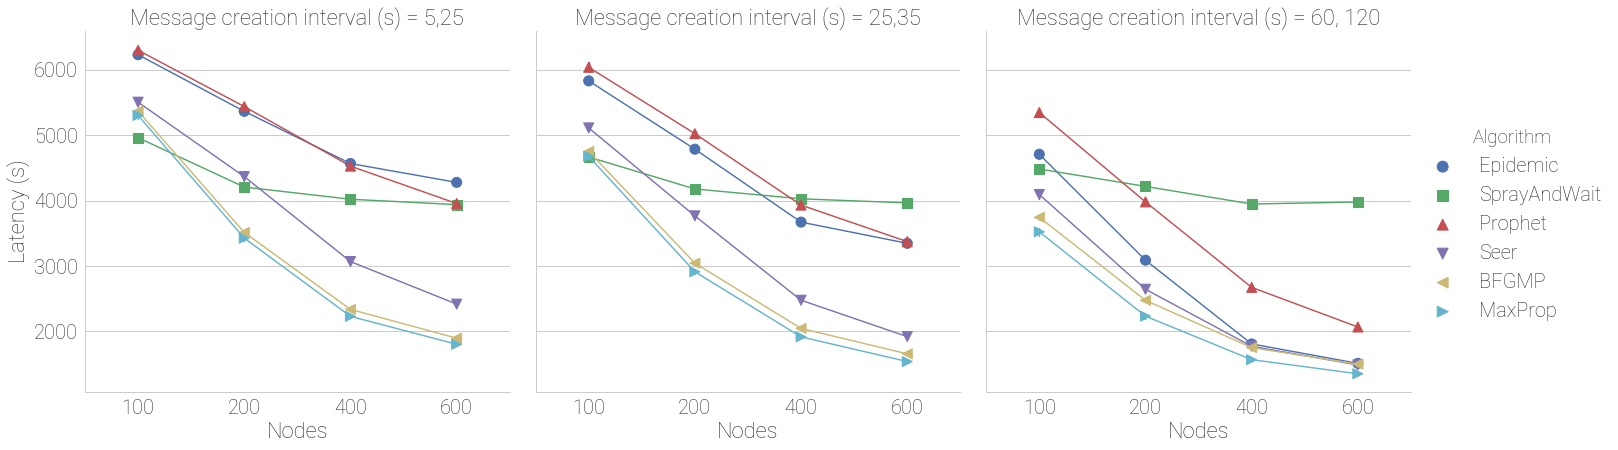

In [8]:
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_latency.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='latency_avg', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_latency.svg')
    pdf.savefig()

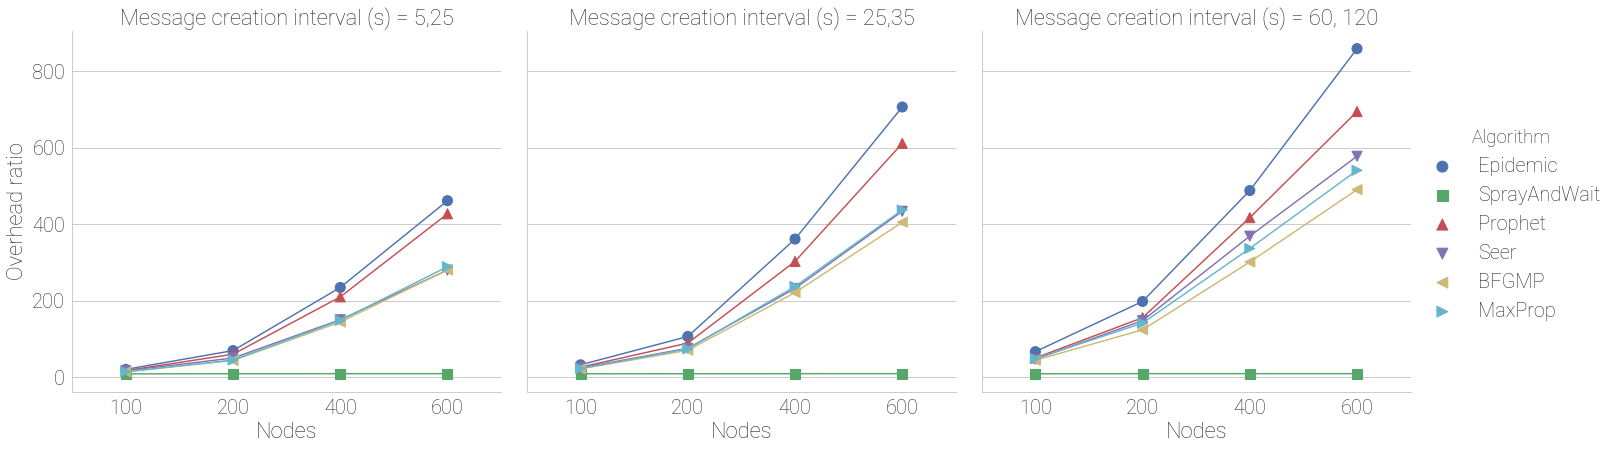

In [9]:
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_overhead.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='overhead_ratio', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_overhead.svg')
    pdf.savefig()